# Proyecto: agencia de autos

Analizaré los datos recopilados durante los últimos años por la agencia de autos para detreminar que factores influyen en el precio del vehículo.


Para comenzar, importaré las librerías y la base de datos con la que trabajaré durante este proyecto. 

## Inicialización

In [ ]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt


### Cargar datos

In [ ]:
# Carga el archivo de datos en un DataFrame

df= pd.read_csv('/datasets/vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina



In [ ]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
# imprimir una muestra de datos

df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Con la descripción del dataset brindada y la muestra de datos que tenemos podemos observar que hay algunas columnas a las cuales se les va a tener que hacer un cambio de tipo de dato. También se ven valores ausentes en 5 de las columnas teniendo la mayor cantidad de valores ausentes la columna 'is_4wd'. En la descripción, ésta columna es de tipo booleana con lo cual podríamos pensar que los valores ausentes en realidad no son ausentes sino que los vehículos no tienen tracción en las 4 ruedas. 

### Conclusiones y siguientes pasos

Para concluir el análisis inicial de los datos, hay columnas a las cuales le voy a cambiar el tipo de dato. La columna 'model_year' la voy a pasar a int porque los años son números enteros. La columna 'is_4wd' la voy a pasar a tipo de dato booleano y a la columna 'date_posted', la voy a transformar en datetime.
Con respecto a los valores ausentes, la que columna que tiene mayor cantidad de valores ausentes es 'is_4wd'. Al ser una columna booleana es probable que todos los valores catalogados como ausentes, en realidad sean valores falsos. Voy a corregir eso. Con el resto de las columnas invetsigaré un poco más para ver si hay algun valor ausente que pueda ser reemplazado por otro o quedarán como valores ausentes.
Cada anuncio representa un vehículo. Estos, tienen distintas características particulares de cada uno y no es lo mismo que tenga un valor u otro.     
Puede que tenga que hacer alguna otra modificación a lo largo de la investigación para facilitar cálculos y/o análisis.

## Tratar los valores ausentes (si hay)

In [ ]:
df['is_4wd'].isna().sum() 
df['is_4wd']= df['is_4wd'].fillna(0.0)
df['is_4wd'].isna().sum()

0

In [ ]:
df['model_year']= df['model_year'].fillna(0)
df['model_year'].isna().sum()


0

In [ ]:
df['paint_color']= df['paint_color'].fillna('unknown')

## Corregir los tipos de datos

In [ ]:
df['model_year']= df['model_year'].astype('int')


In [ ]:
df['is_4wd']= df['is_4wd'].astype('bool')

In [ ]:
df['date_posted']= pd.to_datetime(df['date_posted'], format= '%Y-%m-%d')


## Enriquecer datos

In [ ]:
# Agrega los años del vehículo cuando el anuncio se colocó
año_posteo= df['date_posted'].dt.year
año_auto= df['model_year']
df['antiguedad_auto']= año_posteo - año_auto
df['antiguedad_auto']
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,antiguedad_auto
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7
1,25500,0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,False,2019-03-22,9,16
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2


In [ ]:
# Agrega el millaje promedio del vehículo por año
 
df['millaje_prom_por_año']= round(df['odometer']/ df['antiguedad_auto'],1)
df['millaje_prom_por_año']


0        20714.3
1           44.0
2        18333.3
3            NaN
4        40451.5
          ...   
51520    17627.2
51521    11343.8
51522    14222.2
51523    27914.6
51524        NaN
Name: millaje_prom_por_año, Length: 51525, dtype: float64

In [ ]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente

df['condition']= df['condition'].replace({'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0})


In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.dropna()

## Comprobar datos limpios

In [ ]:
# imprime la información general/resumida sobre el DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39184 entries, 0 to 51523
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 39184 non-null  int64         
 1   model_year            39184 non-null  int64         
 2   model                 39184 non-null  object        
 3   condition             39184 non-null  int64         
 4   cylinders             39184 non-null  float64       
 5   fuel                  39184 non-null  object        
 6   odometer              39184 non-null  float64       
 7   transmission          39184 non-null  object        
 8   type                  39184 non-null  object        
 9   paint_color           39184 non-null  object        
 10  is_4wd                39184 non-null  bool          
 11  date_posted           39184 non-null  datetime64[ns]
 12  days_listed           39184 non-null  int64         
 13  antiguedad_auto 

In [ ]:
# imprimir una muestra de datos
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,antiguedad_auto,millaje_prom_por_año
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.3
1,25500,0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,44.0
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.5


## Estudiar parámetros principales

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

<AxesSubplot:title={'center':'Precio'}, ylabel='Frequency'>

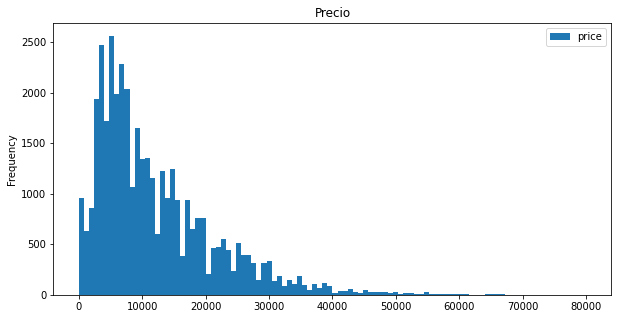

In [ ]:
df.plot(kind='hist',y='price',figsize=(10,5),bins= 100,range=(0,80000), title='Precio')


En este histograma de la columna 'price' podemos observar que los precios son muy variados. Hay muchos precios bajos y también precios muy altos aunque en menor cantidad. La mayor concentración se encuentra entre los 5000 y los 10000. Los precios atípicos seran tratados más adelante.

<AxesSubplot:title={'center':'Antiguedad de los autos'}, ylabel='Frequency'>

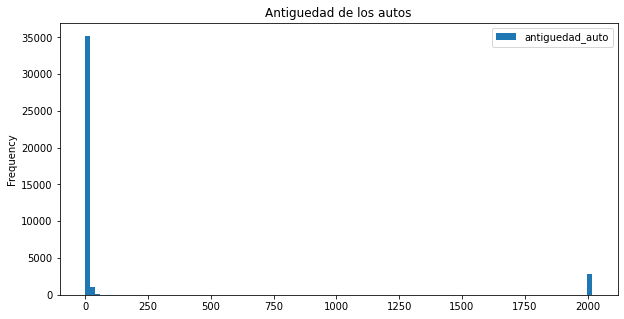

In [ ]:
df.plot(kind='hist',y='antiguedad_auto',bins=100, figsize=(10,5), title='Antiguedad de los autos')


En el histograma de la columna 'antiguedad_auto', podemos observar que tenemos un conjunto de datos muy ceerca del cero y otros mucho más pequeños en el 2000. Esto se debe a que había autos que no tenian cargado el año; tomo como antiguedad el año de publicación. Los valores que estan cerca de 0, son autos más nuevos. Cabe recordar que la antiguedad del auto fue calculado según se pedía, es decir la antiguedad del auto al momento de carga de artículo en la página web. Estos datos atípicos serán tratados más adelante.

<AxesSubplot:title={'center':'Millas que tienen los autos'}, ylabel='Frequency'>

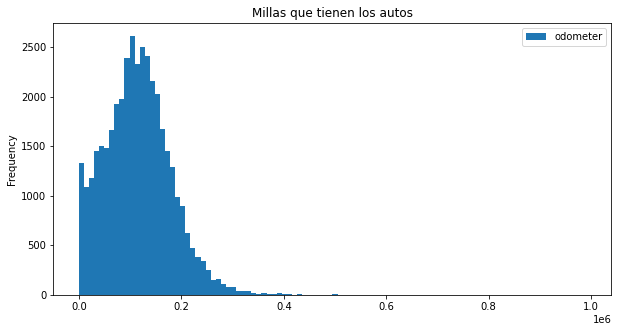

In [ ]:
df.plot(kind='hist',y='odometer',bins=100, figsize=(10,5), title='Millas que tienen los autos')

El histograma para la columna 'odometer', muestra que casi todos los autos tienen entre 0 y 300000 millas. Hay datos mucho mayores pero en el gráfico no se ven bien. Por otro lado, hay muchos autos que dicen que tienen 0 millas pero son autos viejos con lo cual esos datos tambien serán excluidos ya que no son representaticos. 

<AxesSubplot:title={'center':'Cantidad de cilindros'}, ylabel='Frequency'>

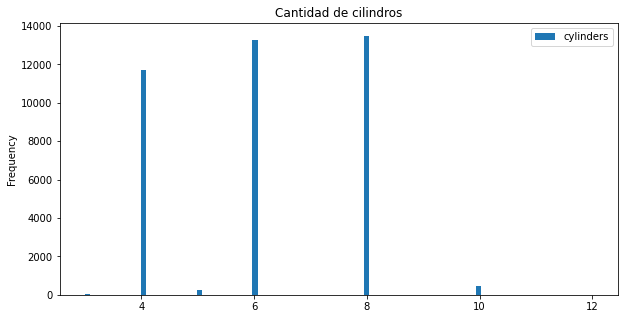

In [ ]:
df.plot(kind='hist',y='cylinders',bins=100, figsize=(10,5), title='Cantidad de cilindros' )

Del histograma de la columna 'cylinder' podemos observar que la mayoría de los autos tienen 4, 6 y 8 cilindros siendo 8 y 6 los más populares. Unos pocos tienen 3, 5 o 10.

<AxesSubplot:title={'center':'Estado del auto'}, ylabel='Frequency'>

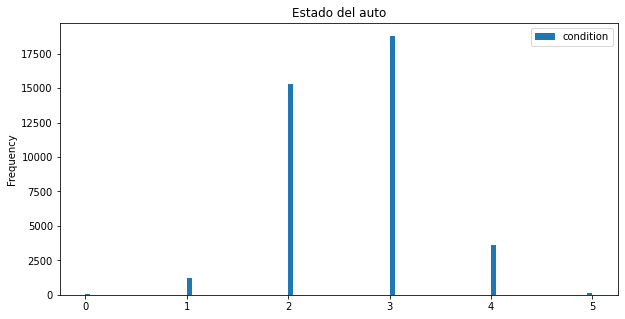

In [ ]:
df.plot(kind='hist',y='condition',bins=100, figsize=(10,5), title='Estado del auto')


De este histograma de la columna 'condition' podemos observar que los autos que estan a la venta en este sitio web alegan estar en excelentes condiciones y otro tanto en buenas condiciones.



## Estudiar y tratar valores atípicos



In [ ]:
df.query('price > 1000 and price < 20000')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,antiguedad_auto,millaje_prom_por_año
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.3
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.5
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,26404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,13,8476.9
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,17627.2
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,16,11343.8
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,14222.2


In [ ]:
df.query('antiguedad_auto <20')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,antiguedad_auto,millaje_prom_por_año
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.3
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.5
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,3,26404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,13,8476.9
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,17627.2
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,16,11343.8
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,14222.2


In [ ]:
df.query('odometer >10000 and odometer < 200000')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,antiguedad_auto,millaje_prom_por_año
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,7,20714.3
1,25500,0,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,44.0
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,6,18333.3
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,40451.5
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,4,14488.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,13,8476.9
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,5,17627.2
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,16,11343.8
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,9,14222.2


## Estudiar parámetros principales sin valores atípicos

<AxesSubplot:title={'center':'Precio autos'}, ylabel='Frequency'>

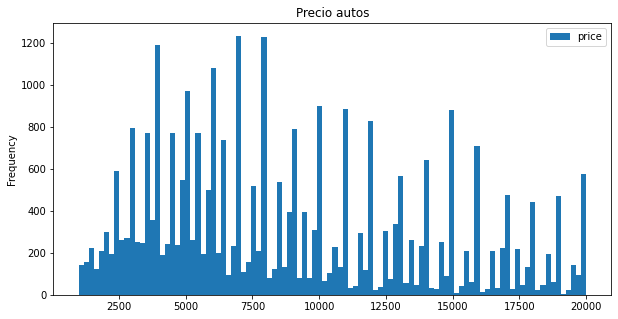

In [ ]:
df.plot(kind='hist',y='price',figsize=(10,5),bins= 100,range=(1000,20000), title='Precio autos')

Al sacarle los valores muy altos y muy bajos podemos ver como cambio la forma del histograma. Podemos observar que la mayor cantidad de datos esta hasta los 10 000. Hay mucha varación de precios. Hay precios que destacan más ya que tienen mayor frecuencia y entremedio de esos precios hay muchos precios distintos con poca cantidad de autos por precio.

<AxesSubplot:title={'center':'Antiguedad de los autos'}, ylabel='Frequency'>

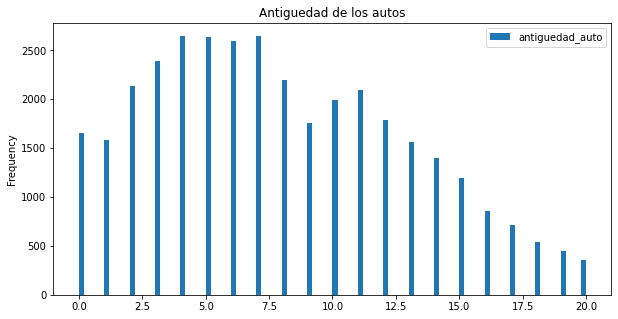

In [ ]:
df.plot(kind='hist',y='antiguedad_auto',bins=100, figsize=(10,5), range= (0,20), title='Antiguedad de los autos')



Este histograma muestra mucho mejor la distribución de la antiguedad de los autos publicados. El rango etario mas popular de los autos es entre 4 y 7 años de antiguedad. A partir de los 11 años de antiguedad, la cantidad de autos comienza a disminuir. 

<AxesSubplot:title={'center':'Millas que tiene los autos'}, ylabel='Frequency'>

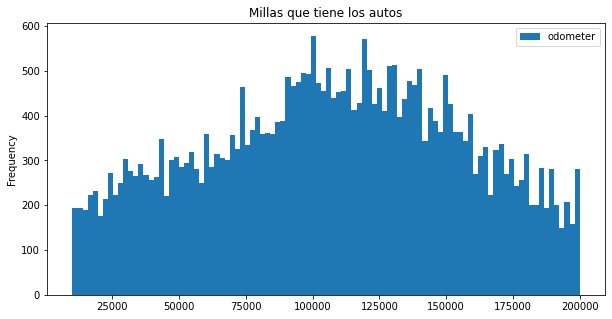

In [ ]:

df.plot(kind='hist',y='odometer',bins=100, figsize=(10,5), range=(10000,200000), title='Millas que tiene los autos')


En comparación con el otro Histograma de la columna 'odometer', se puede observar mejor la distribución de los datos. Se puede ver como va aumentando la cantidad de millas que tienen los vehículos publicados, llegando al pico de los 100 000. A partir de las 125000 millas, a medida que aumentan las millas que tienen un vehículo, baja la cantidad de vehívulos ofrecidos.

## Periodo de colocación de los anuncios



In [ ]:
df['days_listed'].describe()


count    39184.000000
mean        39.620126
std         28.111703
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

<AxesSubplot:>

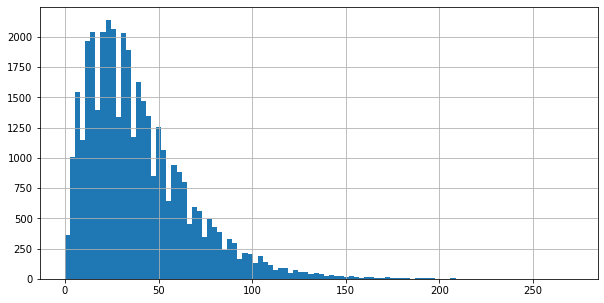

In [ ]:
df['days_listed'].hist(bins=100, figsize=(10,5))


<AxesSubplot:>

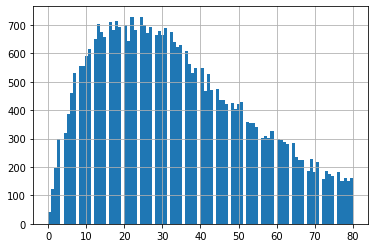

In [ ]:
df['days_listed'].hist(bins=100, range=(0,80))

<AxesSubplot:>

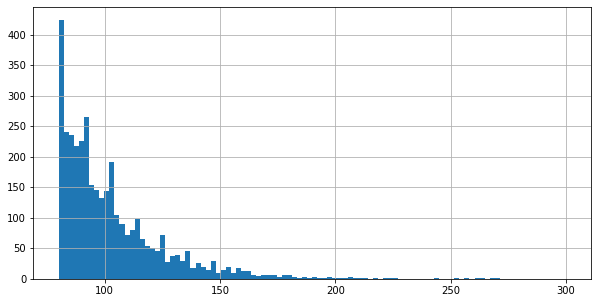

In [ ]:
df['days_listed'].hist(bins=100, range=(80,300), figsize=(10,5))

Los períodos de publicación son muy variados. Van desde los 0 días hasta los 267 días. El promedio de días que los autos estan publicados es de 39 días mientras que la mediana es de 33 días. Si bien hay muchas publicaciones que estan cerca de la mediana, tenemos varias publicaciones que exceden ese tiempo considerablemente haciendo que aumente el promedio. Hay varios factores que pueden influir en la cantidad de días de una publicación. Los autos en esas publicaciones tienen muchas millas y algunos precios muy altos. Otros estan en malas condiciones y tienen muchas millas lo cual también puede ser un factor para que esten tanto tiempo publicados. Otra posibilidad es que haya habido un error en la carga de los datos, con lo cual el posteo aparece pero es rápidamente eliminado.

## Precio promedio por cada tipo de vehículo

In [ ]:
#calculamos el precio promedio por cada modelo de vehículo

precio_prom= df.pivot_table(index='model', values='price',aggfunc='mean')
precio_prom.sort_values(by='price')


,price
model,
chevrolet trailblazer,4211.469072
ford taurus,4588.253275
dodge dakota,4714.646465
nissan versa,5406.232673
jeep liberty,5485.432331
...,...
jeep wrangler unlimited,23496.959420
ford f150 supercrew cab xlt,24838.696850
ford mustang gt coupe 2d,25032.800905


In [ ]:
#calculamos la cantidad de anuncios por modelo de vehículo

cant_anuncios= df['model'].value_counts()
cant_anuncios


ford f-150                  2121
chevrolet silverado 1500    1644
ram 1500                    1321
chevrolet silverado          959
jeep wrangler                851
                            ... 
ford f-250 super duty        180
chrysler 200                 179
acura tl                     178
nissan murano                176
kia sorento                  172
Name: model, Length: 99, dtype: int64

In [ ]:
# averiguamos el precio para los dos modelos más populares

precio_modelos_populares= precio_prom.query('model in("chevrolet silverado 1500","ford f-150")')
precio_modelos_populares

,price
model,
chevrolet silverado 1500,15878.832117
ford f-150,14103.669496


Podmeos observar que el modelo de vehículo con mayor cantidad de anuncios es la ford f-150, seguida por el chevrolet silverado 1500.

<AxesSubplot:title={'center':'Cantidad de anuncios por modelo'}>

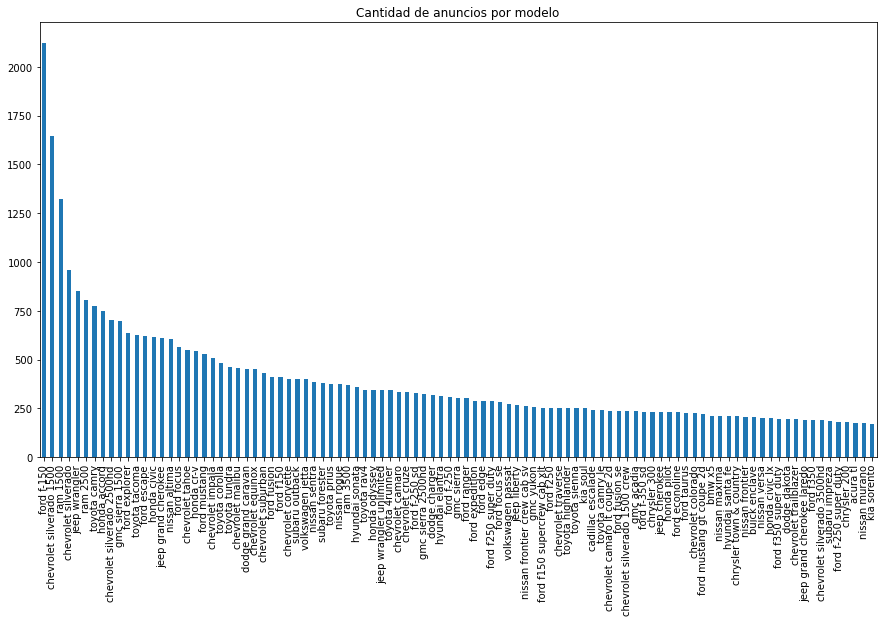

In [ ]:

cant_anuncios.plot(kind='bar', x='model', figsize=(15,8), title='Cantidad de anuncios por modelo')

## Factores de precio

In [ ]:
relacion= df.pivot_table(index='model', values=['price','antiguedad_auto','odometer','condition'])
print(relacion.corr())

                 antiguedad_auto  condition  odometer     price
antiguedad_auto         1.000000   0.186705  0.179304 -0.101789
condition               0.186705   1.000000  0.151732 -0.391285
odometer                0.179304   0.151732  1.000000 -0.242578
price                  -0.101789  -0.391285 -0.242578  1.000000


Como podemos observar, el factor que más influye en el precio es la condición. Si bien ninguno de los factores tiene una correlación muy marcada ya sea positiva o negativa, la condición es la que mayor incidencia tiene sobre el precio.

array([[<AxesSubplot:xlabel='antiguedad_auto', ylabel='antiguedad_auto'>,
        <AxesSubplot:xlabel='condition', ylabel='antiguedad_auto'>,
        <AxesSubplot:xlabel='odometer', ylabel='antiguedad_auto'>,
        <AxesSubplot:xlabel='price', ylabel='antiguedad_auto'>],
       [<AxesSubplot:xlabel='antiguedad_auto', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='price', ylabel='condition'>],
       [<AxesSubplot:xlabel='antiguedad_auto', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='price', ylabel='odometer'>],
       [<AxesSubplot:xlabel='antiguedad_auto', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'

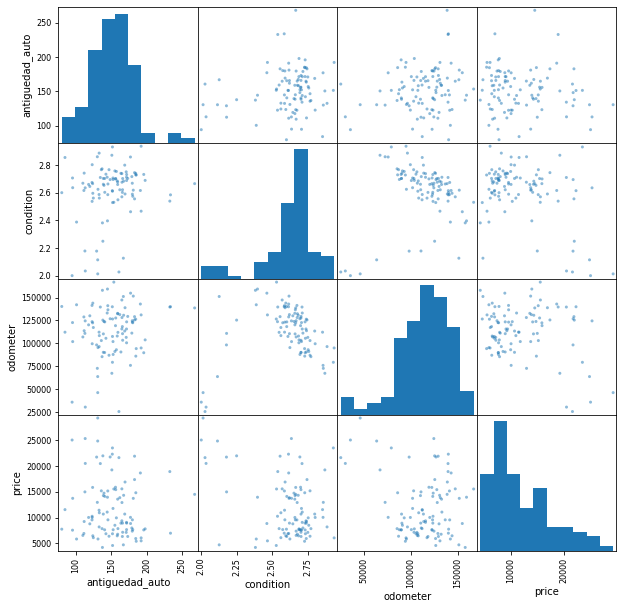

In [ ]:
pd.plotting.scatter_matrix(relacion, figsize=(10,10))

<AxesSubplot:xlabel='transmission'>

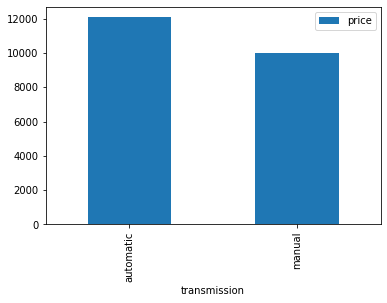

In [ ]:
df.query('transmission!= "other"').pivot_table(index='transmission', values='price').plot(kind='bar')


En este gráfico de barras, podemos observar que los vehículos automáticos son un poco mas caros que los vehículos manuales.

<AxesSubplot:xlabel='paint_color'>

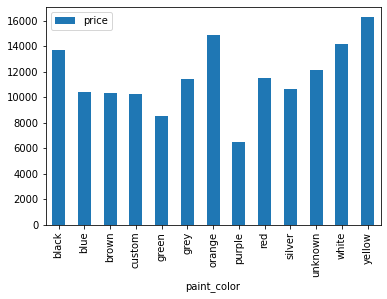

In [ ]:
df.pivot_table(index='paint_color', values='price').plot(kind='bar')

En este gráfico de barras, podemos observar que los autos más caros son aquellos que son de color amarillo y naranja. Si bien no son los colores más comunes, puede ser que sea el color de autos más exclusivos o preparados especialmente y sean más caros. 

## Conclusión general



Para concluir el análisis, las publicaciones de los vehículos eran muy variadas. No había ningún factor que sea claramente determinante en el precio del vehículo. Había vehículos en malas condiciones con precios muy altos y otros acorde a su condición, vehículos con muchas millas y precios acorde a su millaje y otros con precios muy altos. Al final,el factor que influye un poco más en el precio es la condición seguido por las millas que tiene el auto.El precio de los vehículos automáticos es un poco más elevado que los vehículos con caja manual.  
Con respecto a los colores en los autos, no diría que es un factor que influye en el precio del vehículo directamente, sino más bien, una característica de los autos más caros que tienen un color poco común. Puede que sean autos más 'exclusivos' que no importa el año, millaje, color siempre van a ser más caros; lo que vale es la marca.
Con respecto a la base de datos en general, había bastantes datos ausentes. Algunos era conveniente reemplazarlos y otros no ya que las características son muy particulares de cada anuncio.   
